## Simple Linear Regression

In [3]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#create sample weight height data set csv file

# def create_sample_data():
#     data = []
#     for i in range(100):
#         height = random.randint(140, 190)
#         weight = height - 100 + random.randint(-10, 10)
#         data.append([height, weight])
#     return data

# def write_csv(data, filename):

#     with open(filename + '.csv', 'w') as f:
#         writer = csv.writer(f)
#         writer.writerows(data)

# def main():
#     data = create_sample_data()
#     write_csv(data, 'sample_data')

# if __name__ == '__main__':
#     main()



In [5]:
df=pd.read_csv('sample_data.csv')
df.head()

,Height,Weight
0,165,75
1,154,47
2,152,56
3,156,65
4,141,49


Text(0, 0.5, 'Height')

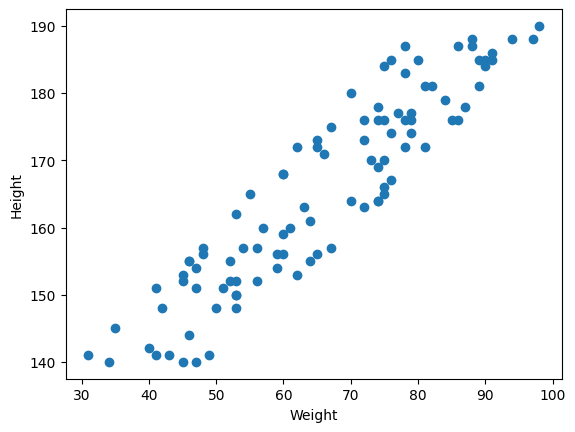

In [6]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Height  99 non-null     int64
 1   Weight  99 non-null     int64
dtypes: int64(2)
memory usage: 1.7 KB


In [9]:
df.describe()

,Height,Weight
count,99.000000,99.000000
mean,165.484848,65.939394
std,14.379239,16.229111
min,140.000000,31.000000
25%,154.000000,53.000000
50%,165.000000,66.000000
75%,176.500000,78.000000
max,190.000000,98.000000


In [10]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

<Axes: >

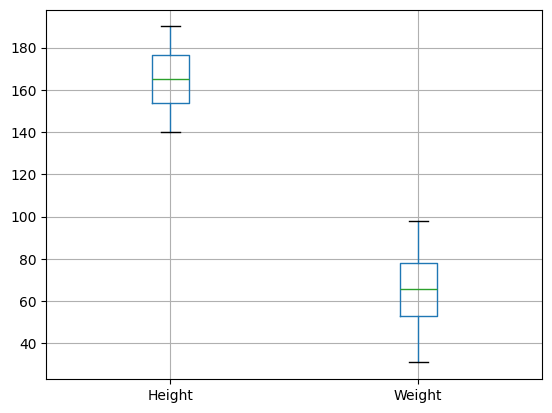

In [11]:
df.boxplot()

In [12]:
# dividing are data set in independent and dependent features
X=df[['Weight']]#independent
Y=df['Height']#dependent feature

In [13]:
X.head()

,Weight
0,75
1,47
2,56
3,65
4,49


In [15]:
Y.head()

0    165
1    154
2    152
3    156
4    141
Name: Height, dtype: int64

In [16]:
X.shape

(99, 1)

In [17]:
Y.shape

(99,)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

In [21]:
x_train.shape,x_test.shape

((66, 1), (33, 1))

In [22]:
y_train.shape,y_test.shape

((66,), (33,))

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler=StandardScaler()

In [25]:
x_train=scaler.fit_transform(x_train)

In [26]:
x_test=scaler.fit_transform(x_test)

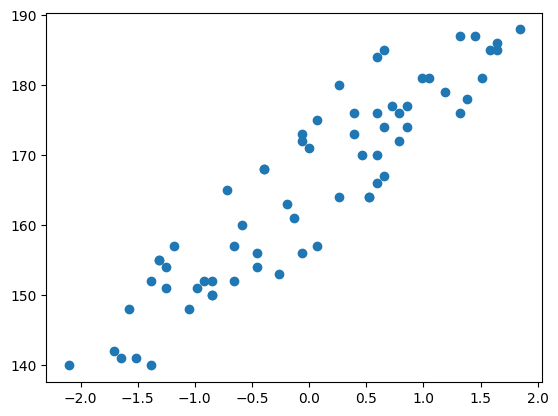

In [29]:
plt.scatter(x_train,y_train)

In [30]:
#Model train
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [31]:
#train the data set
regression.fit(x_train,y_train)

LinearRegression()

In [32]:
regression.intercept_

165.5

In [33]:
regression.coef_

array([12.49316376])

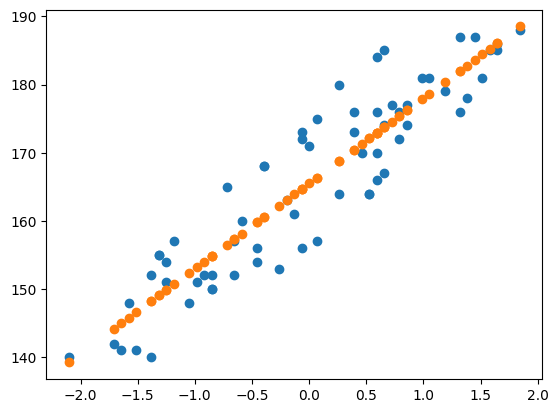

In [40]:
plt.scatter(x_train,y_train)
plt.scatter(x_train,regression.predict(x_train))

In [41]:
    # prediction of train data
    # 1. predicted height output=intercept +coef_(weight)
    # 2. y_pred_train=165.5+ 12.5(x_train)

In [42]:
# prediction for test data
y_pred_test=regression.predict(x_test)

In [44]:
y_pred_test

array([164.20795155, 155.82022721, 178.88646915, 171.19772184,
       143.93761772, 169.79976778, 152.32534207, 180.98340024,
       153.0243191 , 171.89669887, 156.51920424, 174.69260698,
       187.2741935 , 157.21818127, 175.39158401, 153.72329612,
       148.1314799 , 150.92738801, 161.41204344, 151.62636504,
       141.14170961, 173.99362995, 173.99362995, 181.68237727,
       162.11102047, 187.97317052, 162.8099975 , 176.09056104,
       182.3813543 , 156.51920424, 171.19772184, 161.41204344,
       171.19772184])

In [46]:
y_test.head()

62    155
40    155
95    176
18    178
97    145
Name: Height, dtype: int64

In [47]:
# performance metrics MSE,MAE, RMSE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [51]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)

In [49]:
mse

39.741294315766304

In [50]:
mae

5.069006250740351

In [52]:
rmse

6.3040696629848805

In [53]:
# Accuracy of model R square and adjacent
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
score


0.8368458512030856

In [54]:
#adjacent
ad_score=(1- (1-score)*(len(y_test)-1)/(len(y_test)- x_test.shape[1] -1) )

In [56]:
ad_score

0.8315828141451207

In [57]:
scaler

StandardScaler()

In [59]:
regression

LinearRegression()